<a href="https://colab.research.google.com/github/sahilfatima/Wine_Quality/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

#Loading the Dataset

In [3]:
data = pd.read_csv("/content/Wine Quality.csv")

#Exploring the Dataset

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


#Plotting graphs

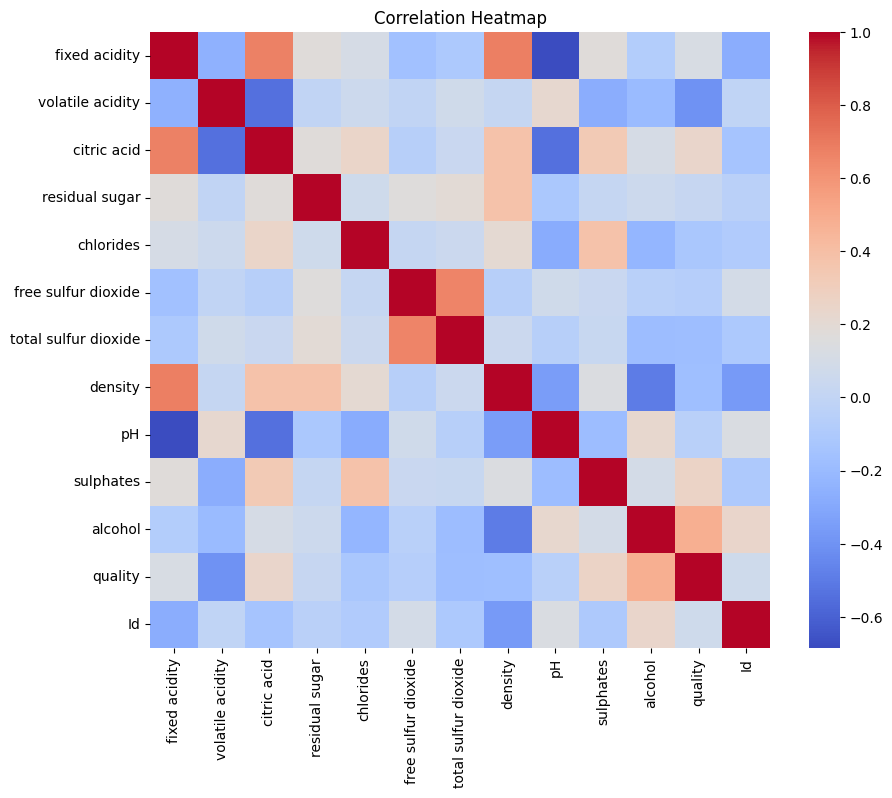

In [9]:
corr_matrix = data.corr()

# Plotting a heatmap
plt.figure(figsize =(10,8))
sns.heatmap(corr_matrix, cmap = "coolwarm", fmt = "0.2f")
plt.title("Correlation Heatmap")
plt.show()

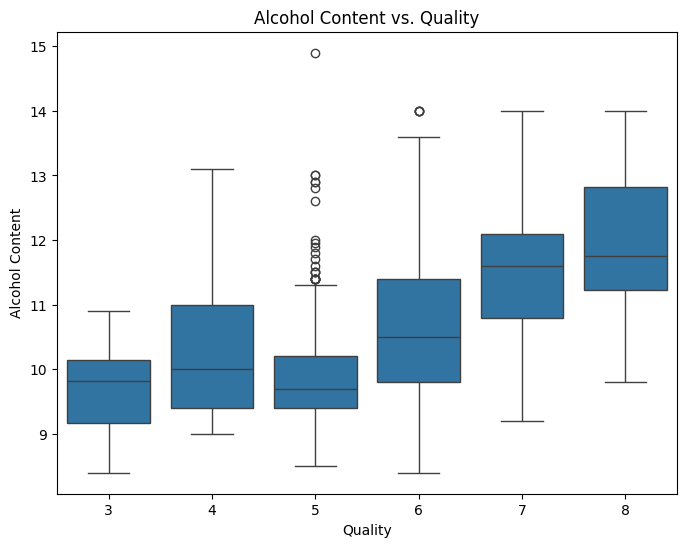

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x= "quality", y= "alcohol", data=data)
plt.title("Alcohol Content vs. Quality")
plt.xlabel("Quality")
plt.ylabel("Alcohol Content")
plt.show()

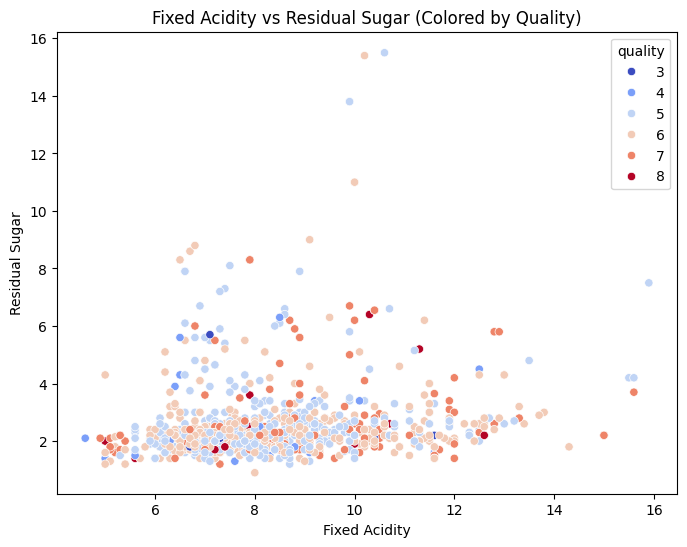

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x ="fixed acidity", y= "residual sugar", data = data, hue = "quality", palette = "coolwarm")
plt.title("Fixed Acidity vs Residual Sugar (Colored by Quality)")
plt.xlabel("Fixed Acidity")
plt.ylabel("Residual Sugar")
plt.show()

#Data Preprocessing

In [54]:
#Since there is no missing data

X = data.drop(columns=["quality", "Id"])
y = data["quality"]

#Splitting the data into Train and Test

In [55]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

#Training the Model

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training SVM Model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

# Predictions for SVM
y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")

SVM Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.67      0.76      0.71       143
           6       0.61      0.66      0.63       146
           7       0.70      0.39      0.50        41
           8       0.00      0.00      0.00         4

    accuracy                           0.64       343
   macro avg       0.40      0.36      0.37       343
weighted avg       0.62      0.64      0.63       343

SVM Accuracy: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Fine Tuning the SVM model

In [71]:
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

svm = SVC()
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5, verbose=1, n_jobs=-1)
svm_grid_search.fit(X_train_scaled, y_train)

print("Best parameters for SVM:", svm_grid_search.best_params_)
print("Best score for SVM:", svm_grid_search.best_score_)

# Evaluation
best_svm = svm_grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)
print("\nSVM Classification Report after Grid Search:")
print(classification_report(y_test, y_pred_svm))
print(f"SVM Accuracy after tuning: {accuracy_score(y_test, y_pred_svm):.2f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for SVM: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score for SVM: 0.60875

SVM Classification Report after Grid Search:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.67      0.77      0.71       143
           6       0.63      0.67      0.65       146
           7       0.73      0.39      0.51        41
           8       0.00      0.00      0.00         4

    accuracy                           0.65       343
   macro avg       0.40      0.37      0.37       343
weighted avg       0.63      0.65      0.63       343

SVM Accuracy after tuning: 0.65


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
